In [216]:
from DescritoresDeImagem.readwritendarray import extractimagesdescriptor, readfilendarray

# Bib joblib, Numpy,skimage,glob,re


# Standart Scale, SVC and KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

import numpy as np
import pickle


In [217]:
#GLCM

distances=[2,4,8,16,32,64,70]
angles=np.deg2rad([0,45,90])


#LBP
Winsize=15
decorr=1

CVPARTS=5 # number of CV parts
RUN=True

if RUN:
    function_glcm=extractimagesdescriptor("DadosExtraidos/Y_Resultado.txt","DadosExtraidos/X_TreinoGLCM.txt","BaseDeDados/*.bmp","GLCM",)
    function_glcm(angles=angles,distances=distances)

    function_lpq=extractimagesdescriptor(file="DadosExtraidos/Y_Resultado.txt",filename="DadosExtraidos/X_TreinoLPQ.txt",pathimg="BaseDeDados/*.bmp",descriptor="LPQ")
    function_lpq(P=15,R=6)

    function_lbp=extractimagesdescriptor(file="DadosExtraidos/Y_Resultado.txt",filename="DadosExtraidos/X_TreinoLBP.txt",pathimg="BaseDeDados/*.bmp",descriptor="LBP")
    function_lbp(winSize=Winsize,decorr=decorr)



X_lbp=readfilendarray(filename="DadosExtraidos/X_TreinoLBP.txt")

X_lpq=readfilendarray(filename="DadosExtraidos/X_TreinoLPQ.txt")

x_lpq_lpq=np.concatenate((X_lpq,X_lbp),axis=1)


y=readfilendarray(filename="DadosExtraidos/Y_Resultado.txt",data="s")


FUNCTION GLCM
FUNCTION LPQ
FUNCTION LBP


In [218]:
pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("model",SVC(kernel="rbf"))]) 
parameters={
    "model__C":[1000,1000,10000],
    "model__gamma":["auto","scale",0.01,1,2],
    "model__degree":[1,3,4,5]
}

svmlpq=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [219]:
pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("model",SVC(kernel="rbf"))]) 
parameters={
    "model__kernel":['linear', 'poly', 'rbf','sigmoid'],
    "model__C":[1,10,100,1000,1000,10000],
    "model__gamma":["auto","scale"]
}

svmlbp_lpq=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [220]:


pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("model",SVC(kernel="rbf"))]) 
parameters={
    "model__C":[1000,1000,10000],
    "model__gamma":["auto","scale"]
}

svmlbp=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [221]:
svmlbp_lpq.fit(X=x_lpq_lpq,y=y)
svmlbp.fit(X=X_lbp,y=y)
svmlpq.fit(X=X_lpq,y=y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid={'model__C': [1000, 1000, 10000],
                         'model__degree': [1, 3, 4, 5],
                         'model__gamma': ['auto', 'scale', 0.01, 1, 2]},
             scoring='f1_macro')

In [222]:
ypredsvmglcm=svmlbp_lpq.predict(X=x_lpq_lpq)
ypredsvmlbp=svmlbp.predict(X=X_lbp)
ypredsvmlpq=svmlpq.predict(X=X_lpq)

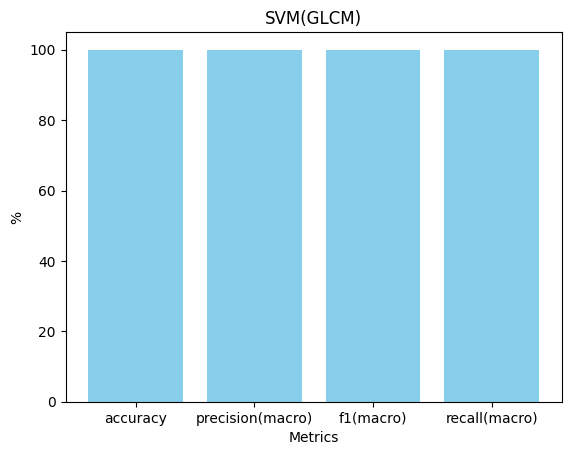

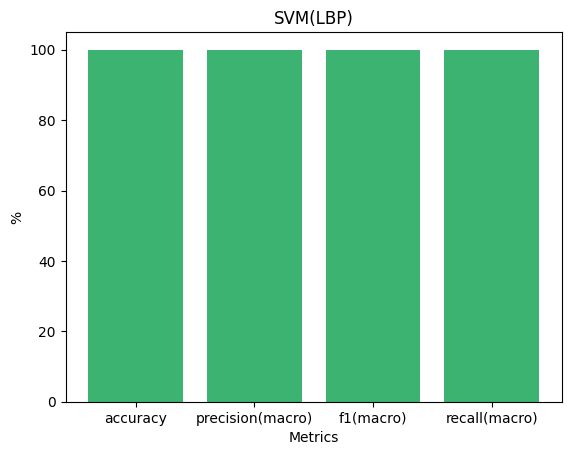

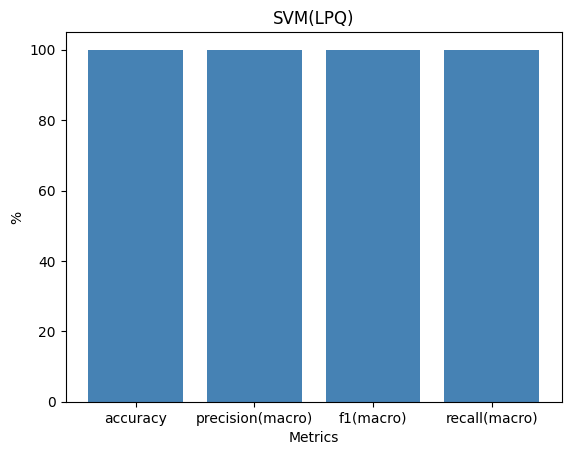

In [223]:
metricsglcm=[accuracy_score(y_true=y,y_pred=ypredsvmglcm)*100,
         precision_score(y_true=y,y_pred=ypredsvmglcm,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredsvmglcm,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredsvmglcm,average='macro')*100]

metricslbp=[accuracy_score(y_true=y,y_pred=ypredsvmlbp)*100,
         precision_score(y_true=y,y_pred=ypredsvmlbp,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredsvmlbp,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredsvmlbp,average='macro')*100]

metricslpq=[accuracy_score(y_true=y,y_pred=ypredsvmlpq)*100,
         precision_score(y_true=y,y_pred=ypredsvmlpq,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredsvmlpq,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredsvmlpq,average='macro')*100]

label=["accuracy","precision(macro)","f1(macro)","recall(macro)"]


plt.bar(x=label,height=metricsglcm,color="skyblue")


plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("SVM(GLCM)")
plt.show()

plt.bar(x=label,height=metricslbp,color='mediumseagreen')

plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("SVM(LBP)")
plt.show()

plt.bar(x=label,height=metricslpq,color="steelblue")

plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("SVM(LPQ)")

plt.show()

In [224]:
print("\tSVM (GLCM) \n")
print(classification_report(y,y_pred=ypredsvmglcm)+"\n")


	SVM (GLCM) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




In [225]:
print("\tSVM (LPQ) \n")
print(classification_report(y,y_pred=ypredsvmlpq)+"\n")

	SVM (LPQ) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




In [226]:
print("\tSVM (LBP) \n")
print(classification_report(y,y_pred=ypredsvmlbp)+"\n")

	SVM (LBP) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




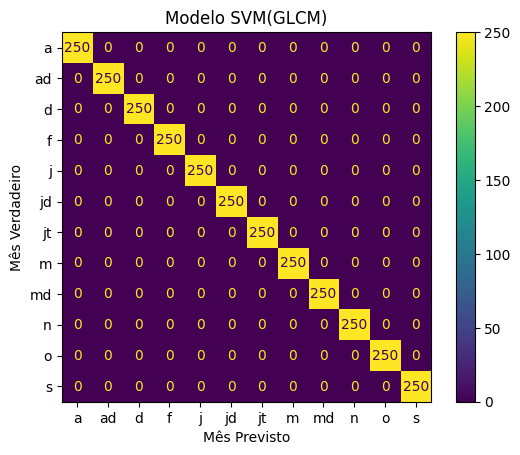

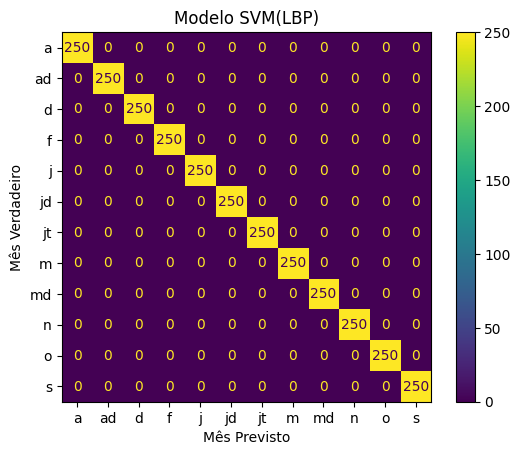

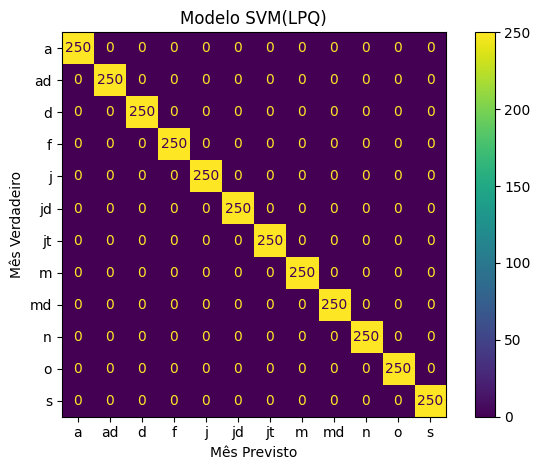

In [227]:
#Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y,ypredsvmglcm)

plt.title("Modelo SVM(GLCM)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")


ConfusionMatrixDisplay.from_predictions(y,ypredsvmlpq)

plt.title("Modelo SVM(LBP)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")

ConfusionMatrixDisplay.from_predictions(y,ypredsvmlpq)

plt.title("Modelo SVM(LPQ)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")

plt.tight_layout()


In [228]:
pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("knn",KNeighborsClassifier())]) 
parameters={
    "knn__n_neighbors":[1,2,3,4,7,8,9],
    "knn__weights":['uniform', 'distance']
}

knnglcm=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)


In [229]:
pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("knn",KNeighborsClassifier())]) 
parameters={
    "knn__n_neighbors":[1,2,3,4,7,8,9],
    "knn__weights":['uniform', 'distance']
}

knnlpq=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [230]:
CVPARTS=5 # number of CV parts

pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("knn",KNeighborsClassifier())]) 
parameters={
    "knn__n_neighbors":[1,2,3,4,7,8,9],
    "knn__weights":['uniform', 'distance']
}

knnlbp=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [231]:
knnglcm.fit(X=X_glcm,y=y)
knnlbp.fit(X=X_lbp,y=y)
knnlpq.fit(X=X_lpq,y=y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 7, 8, 9],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [232]:
ypredknnglcm=knnglcm.predict(X=X_glcm)
ypredknnlbp=knnlbp.predict(X=X_lbp)
ypredknnlpq=knnlpq.predict(X=X_lpq)


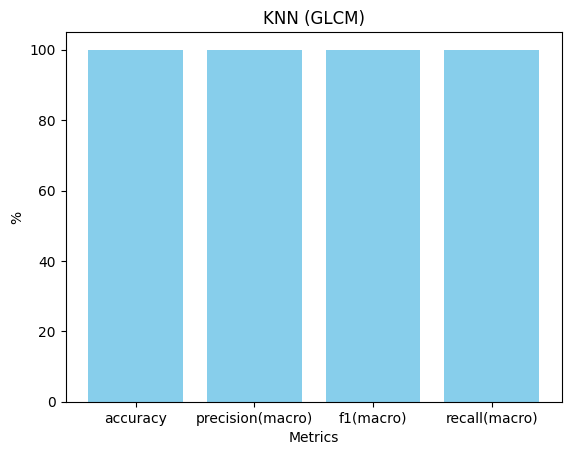

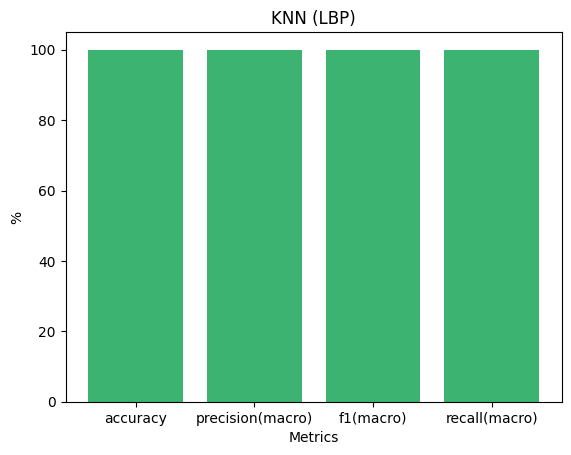

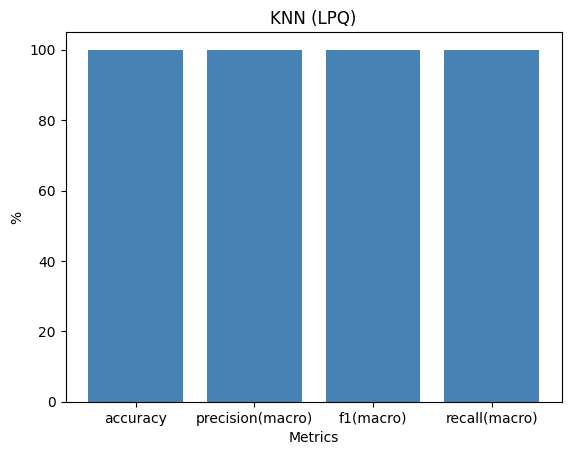

In [233]:
metricsglcm=[accuracy_score(y_true=y,y_pred=ypredknnglcm)*100,
         precision_score(y_true=y,y_pred=ypredknnglcm,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredknnglcm,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredknnglcm,average='macro')*100]

metricslbp=[accuracy_score(y_true=y,y_pred=ypredknnlbp)*100,
         precision_score(y_true=y,y_pred=ypredknnlbp,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredknnlbp,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredknnlbp,average='macro')*100]

metricslpq=[accuracy_score(y_true=y,y_pred=ypredknnlpq)*100,
         precision_score(y_true=y,y_pred=ypredknnlpq,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredknnlpq,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredknnlpq,average='macro')*100]

label=["accuracy","precision(macro)","f1(macro)","recall(macro)"]


plt.bar(x=label,height=metricsglcm,color="skyblue")


plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("KNN (GLCM)")
plt.show()

plt.bar(x=label,height=metricslbp,color='mediumseagreen')

plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("KNN (LBP)")
plt.show()

plt.bar(x=label,height=metricslpq,color="steelblue")

plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("KNN (LPQ)")

plt.show()


In [234]:
print("\tKNN (GLCM) \n")
print(classification_report(y,y_pred=ypredknnglcm)+"\n")


	KNN (GLCM) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




In [235]:
print("\tKNN (LPQ) \n")
print(classification_report(y,y_pred=ypredknnlpq)+"\n")

	KNN (LPQ) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




In [236]:
print("\tKNN (LBQ) \n")
print(classification_report(y,y_pred=ypredknnlbp)+"\n")

	KNN (LBQ) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




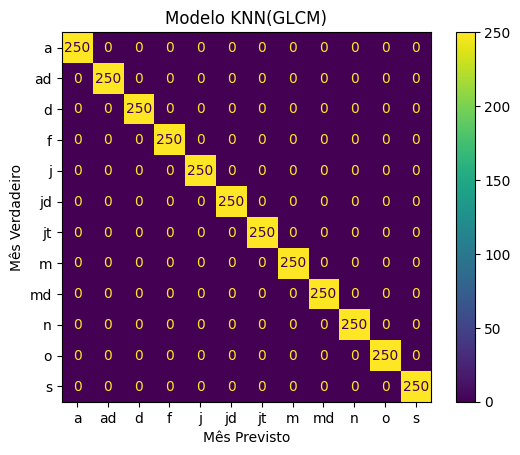

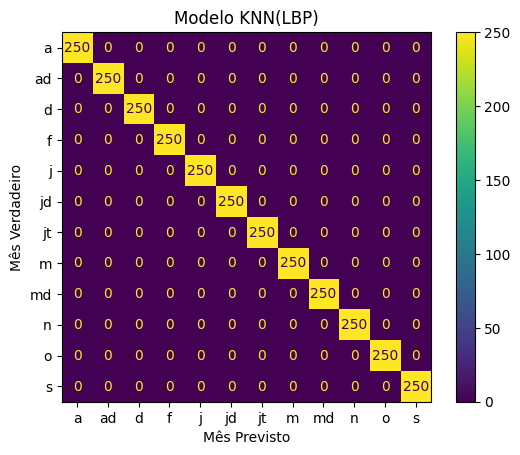

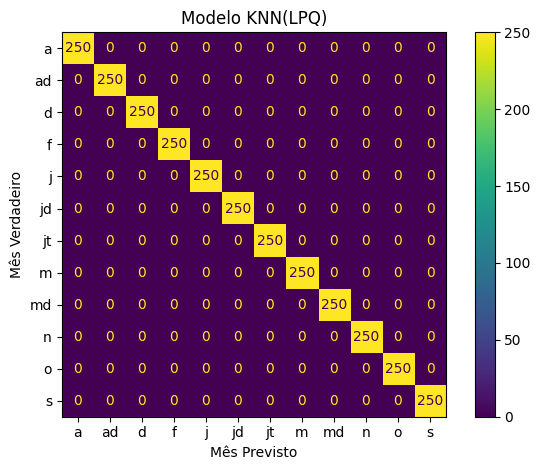

In [237]:
#Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y,ypredknnglcm)

plt.title("Modelo KNN(GLCM)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")


ConfusionMatrixDisplay.from_predictions(y,ypredknnlpq)

plt.title("Modelo KNN(LBP)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")

ConfusionMatrixDisplay.from_predictions(y,ypredknnlpq)

plt.title("Modelo KNN(LPQ)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")

plt.tight_layout()


In [238]:
with open(f"Models/svm_LBP_LPQ.pkl",mode="wb") as fsvm:
    pickle.dump(svmlbp_lpq,fsvm)
with open(f"Models/svm_LBP.pkl",mode="wb") as fsvm:
    pickle.dump(svmlbp,fsvm)
with open(f"Models/svm_LPQ.pkl",mode="wb") as fsvm:
    pickle.dump(svmlpq,fsvm)

In [239]:

with open(f"Models/knn_GLCM.pkl",mode="wb") as fknn:
    pickle.dump(knnglcm,fknn)

with open(f"Models/knn_LBP.pkl",mode="wb") as fknn:
    pickle.dump(knnlbp,fknn)

with open(f"Models/knn_LPQ.pkl",mode="wb") as fknn:
    pickle.dump(knnlpq,fknn)